# Burgers with MacCormack

Conside the 1D Burgers equation:

\begin{equation}
\frac{\partial  u}{\partial t}=-u\frac{\partial u}{\partial x}
\end{equation}

We want to represent this in conservative forms so that we can better deal with potential shocks, which gives us:

\begin{equation}
\frac{\partial u}{\partial t}=-\frac{\partial }{\partial x}\left(\frac{u^2}{2}\right)
\end{equation}

We can also write this as:

\begin{equation}
\frac{\partial u}{\partial t}=-\frac{\partial F}{\partial x}
\end{equation}

If we take $F=\frac{u^2}{2}$. Start with a Heaviside function (a sep function) with the following values:

\begin{equation}
u(x,0)=\left\{\begin{array}{cc} 1 & 0\leq x<2 \\ 0 & 2\leq x\leq 4 \end{array}\right.
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from matplotlib.animation import FuncAnimation
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

Create the initial conditions for $u(x,0)$.

In [2]:
#@njit()
def IC(Nx,Nt,x):
    u=np.zeros((Nx,Nt)) #Create the matrix
    mask=np.where(x<2) #Create a mask where x is less than 2
    #Now, create a loop to put the initial values.
    for i in range(len(mask[-1])):
        u[i,0]=1
    return u

Now, you can use the MacCormack method to solve the PDE. The MacCormack scheme is:

\begin{equation}
\large\begin{array}{cc}
u_i^*=u_i^n-\frac{\Delta t}{\Delta x}(F_{i+1}^n+F_i^n) & \text{Predictor} \\
u_i^{n+1}=\frac{1}{2}\left(u_{i}^n+u_i^*-\frac{\Delta t}{\Delta x}(F_i^*-F_{i-1}^*)\right) & \text{Corrector}
\end{array}
\end{equation}

Remember that

\begin{equation}
F=\frac{u^2}{2}
\end{equation}

You can create two functions to solve this system

In [3]:
#@njit()
def F(u):
    return u**2/2

#@njit()
def u_star(u,k,i,j):
    return u[i,j]-k*(F(u[i+1,j])-F(u[i,j]))

#@njit()
def solution(Nx,Nt,x,dx,dt):
    u=IC(Nx,Nt,x) #Use the function to create the matrix and put the IC
    k=dt/dx       #For simplicity
    for j in range(Nt-1):
        for i in range(Nx-1):
            u[i,j+1]=0.5*(u[i,j]+u_star(u,k,i,j)-k*(F(u_star(u,k,i,j))-F(u_star(u,k,i-1,j))))
        u[0,j+1]=1
    return u

Use $N_x=81$, $N_t=70$ and $\Delta t=0.5\Delta x$. 

In [4]:
Nx=81
Nt=70
x=np.linspace(0,4,Nx)
dx=4/(Nx-1)
dt=0.5*dx

u=solution(Nx,Nt,x,dx,dt)

Create an animate plot.

In [5]:
fig,axs=plt.subplots(1,figsize=(12,5))
line,=axs.plot([],[],color='teal',marker='o',markevery=5)
axs.set_xlim(x.min(),x.max())
axs.set_ylim(u.min()-0.5,u.max()+0.5)
axs.set_grid(False)

def animate(i):
    global x,u
    #axs.clear_collections()
    line.set_data(x,u[:,i])
    return line,

anim=FuncAnimation(fig,animate,frames=Nt,interval=60,blit=True)
plt.close()
%time anim.save('xd.mp4',fps=20)

CPU times: user 10.3 s, sys: 481 ms, total: 10.8 s
Wall time: 11.4 s


\begin{equation}
u_i^*=u_i^n-\frac{\Delta t}{\Delta x}(F_{i+1}^n+F_i^n)+\epsilon(u_{i+1}^n-2u_i^n+u_{i-1}^n)
\end{equation}

In [46]:
def u_star(u,k,i,j):
    global epsilon
    if (i==0):
        return u[i,j]-k*(F(u[i+1,j])-F(u[i,j]))+epsilon*(u[i+1,j]-u[i,j])
    else:
        return u[i,j]-k*(F(u[i+1,j])-F(u[i,j]))+epsilon*(u[i+1,j]-2*u[i,j]+u[i-1,j])

epsilon=0.5
u=solution(Nx,Nt,x,dx,dt)

anim=FuncAnimation(fig,animate,frames=Nt,interval=60,blit=True)

%time anim.save('xd2.mp4',fps=20)

CPU times: user 4.9 s, sys: 246 ms, total: 5.15 s
Wall time: 5.47 s


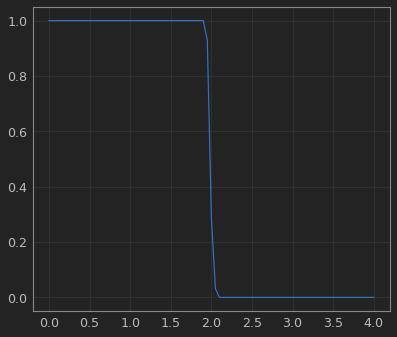

In [44]:
plt.plot(x,u[:,1])